#  Unit 2.2 Data Compression, plus Images Lab
> Learning about Lossy and Lossless compression.  Lab will perform alterations on images, manipulate RGB values, and reduce the number of pixels.
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

## Enumerate Big Ideas from
> The [Image Lab Project](https://csp.nighthawkcodingsociety.com/starter/rgb/) contains a plethora of College Board Unit 2 data concepts. Enumerate some of the big ideas and vocab ...
- 
- 
-
-

## Image Files and Size
> Here are some [Images Files](https://github.com/nighthawkcoders/nighthawk_csp/tree/master/starter/static/img).  WGet some of these files, load them on your machine.   Describe some of the properties of the files.  Describe files that are similar, but different ...
-
-
-
-

## Python Libraries and Concepts used in Images Lab

### IPython 
> Support visualization of data in Jupyter notebooks.  Visualization is specific to View, for the web visualization needs to be converted to HTML.

### pathlib
> File paths are different on Windows versus Mac and Linux.  This can cause problems in a project as you work and deploy on different Operating Systems (OS's), pathlib is a solution to this problem. 
- What are commands you use in terminal to access files?
- What are the command you use in Windows terminal to access files?
- What are some of the major differences?


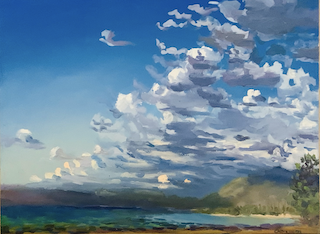

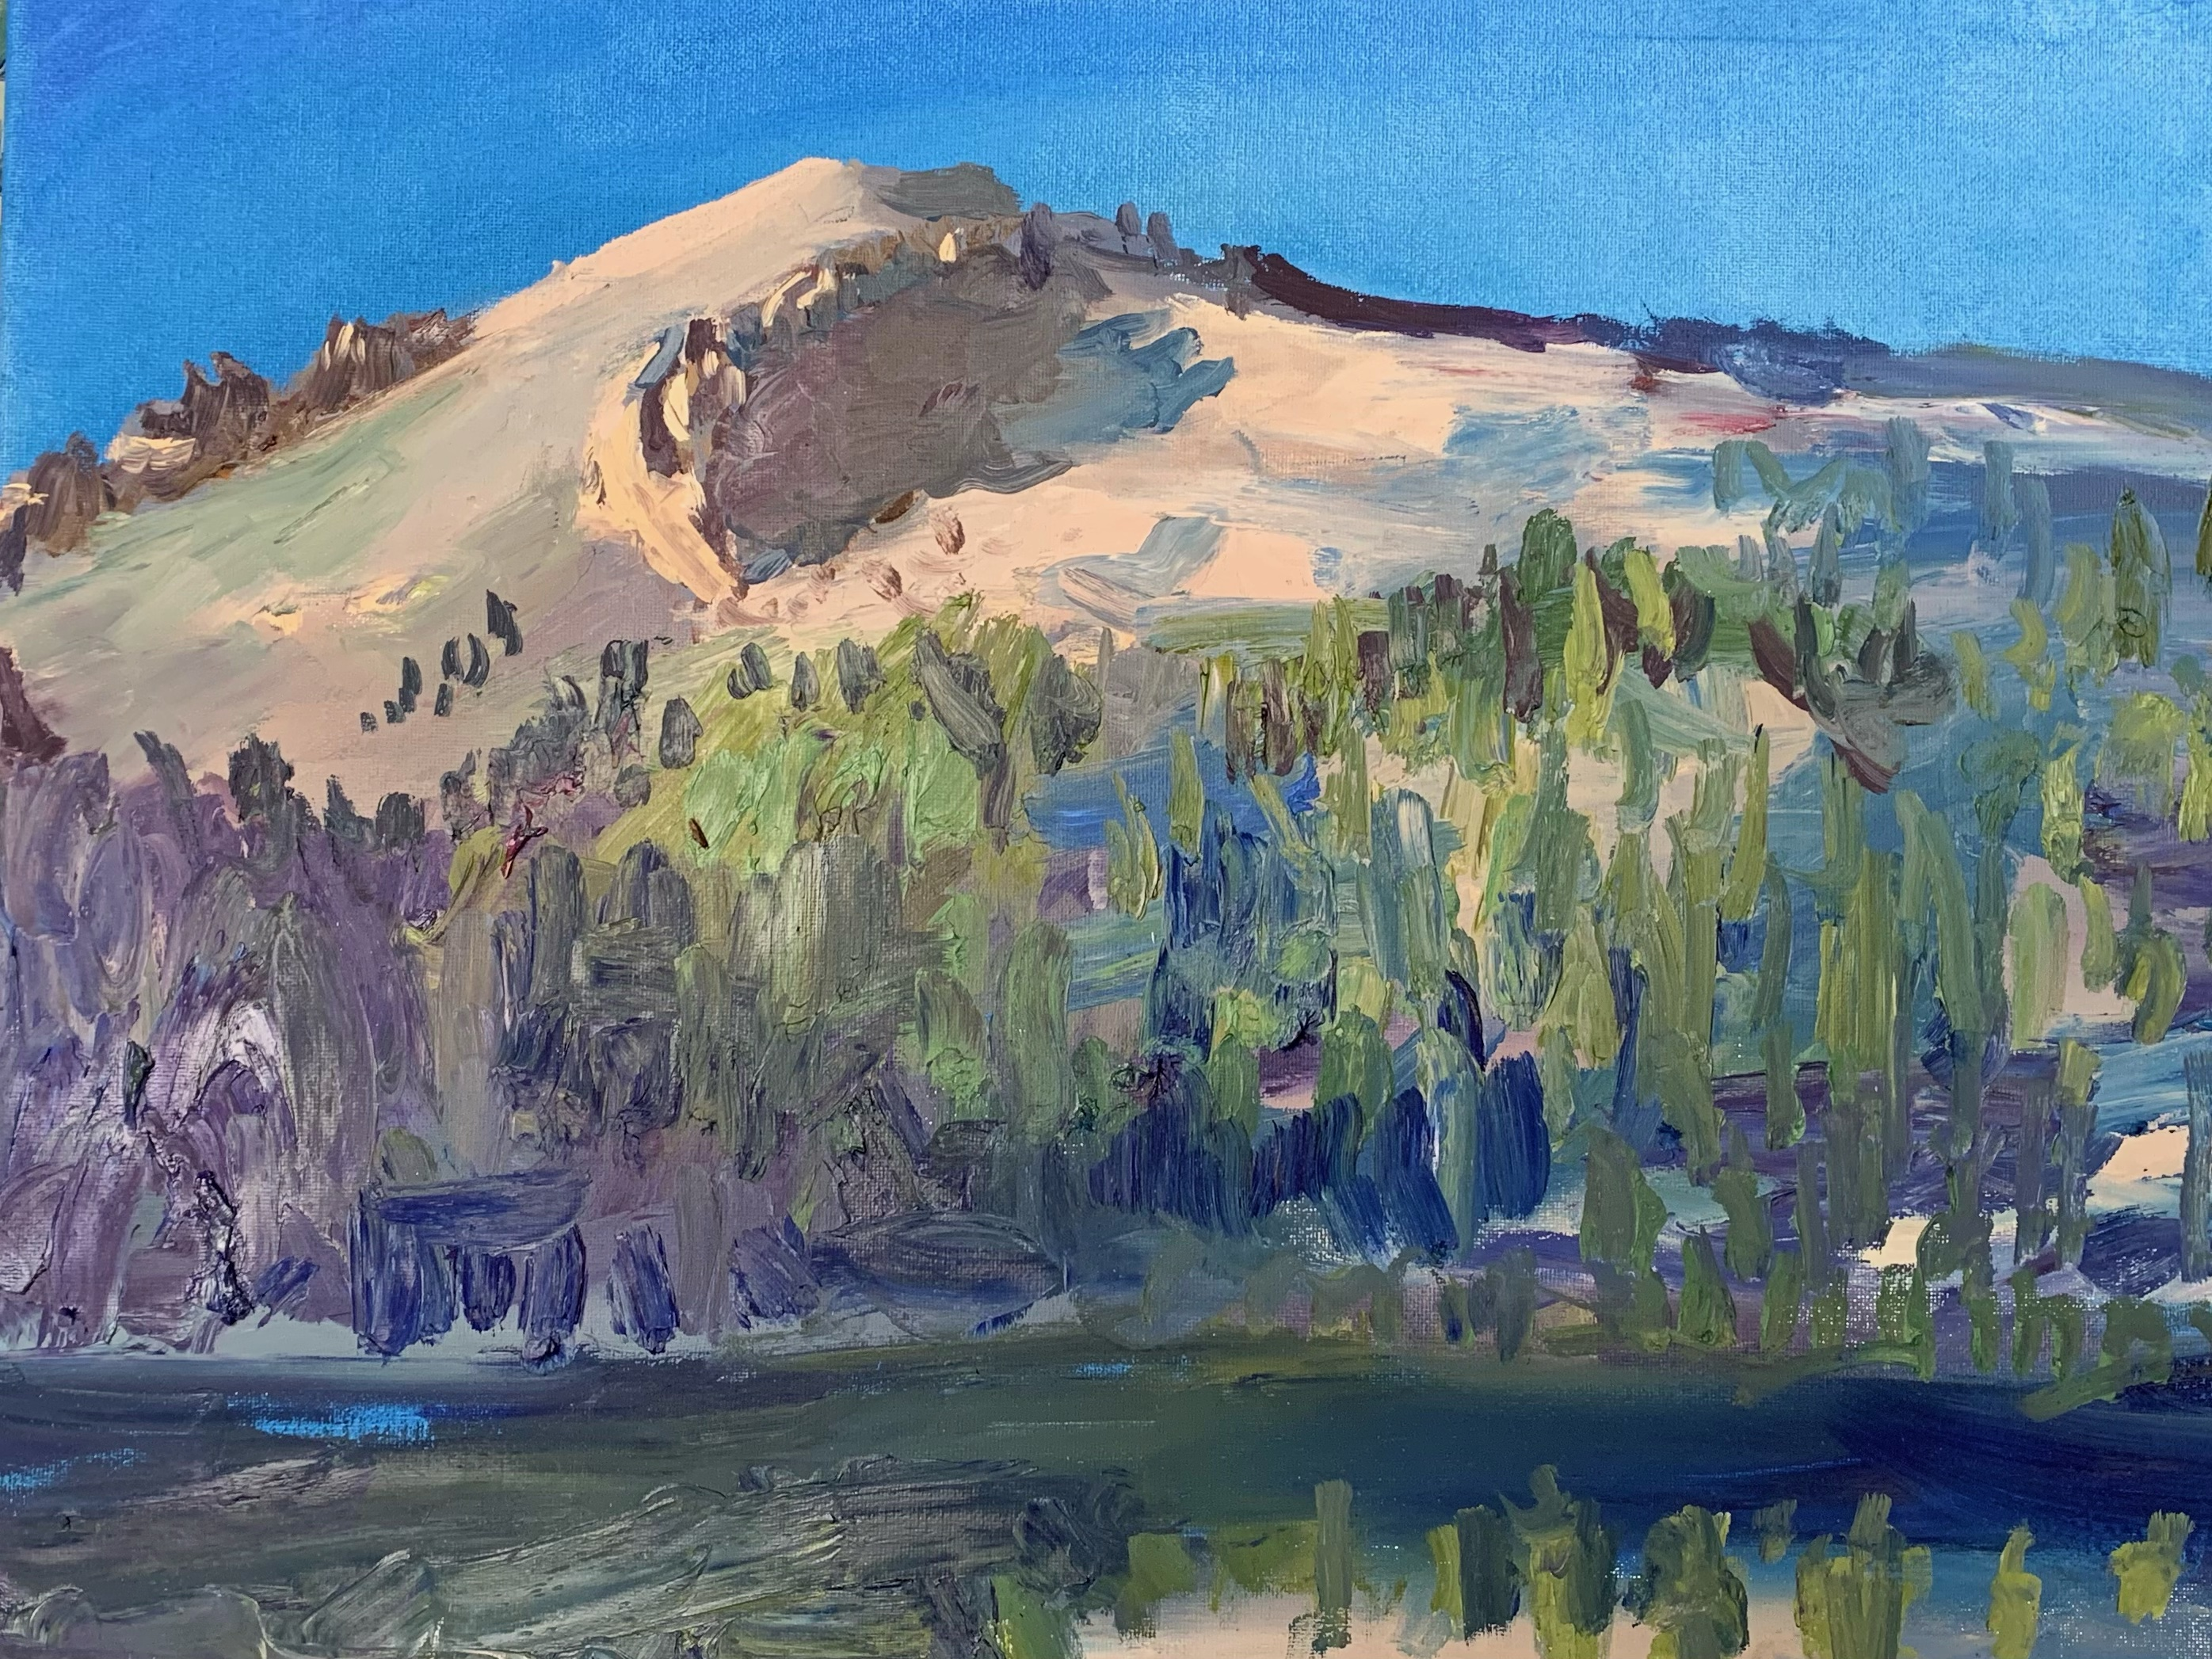

In [40]:

from IPython.display import Image, HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# run this as standalone tester to see sample data printed in terminal
if __name__ == "__main__":
    images = image_data()  # path of local run
    image_display(images)
    print()

## Reading and Encoding Images

### PIL (Python Image Library)
> [Pillow or PIL](https://pillow.readthedocs.io/en/stable/) provides the ability to work with images in Python.  [Geeks for Geeks](https://www.geeksforgeeks.org/working-images-python/?ref=lbp) shows some ideas on working with images.  


### base64
> Image formats (JPG, PNG) are often called ***Binary File formats**, it is difficult to pass these over HTTP.   Thus, [base64](https://en.wikipedia.org/wiki/Base64) converts binary encoded data (8-bit, ASCII/Unicode) into a text encoded scheme (24 bits, 6-bit Base64 digits).  Thus base64 is used to transport and embed binary images into textual assets such as HTML and CSS.
- How is Base64 similar or different to Binary and Hexadecimal?
- Translate first 3 letters of your name to Base64.


### numpy
> [Numpy](https://numpy.org/) is described as "The fundamental package for scientific computing with Python".  In the Image Lab, a Numpy array is created from the image data in order to simplify access and change to the RGB values of the pixels, converting pixels to grey scale.


### io, BytesIO
> Input and Output (I/O) is a fundamental of all Computer Programming. Input/output (I/O) buffering is a technique used to optimize I/O operations.  In large quantities of data, how many frames of input the server currently has queued is the buffer.  In this example, there is a very large picture that lags.
- Where have you been a consumer of buffering?  
- From your consumer experience, what effects have you experienced from buffering?  
- How do these effects apply to images?


---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
(320, 234)
-- original image --



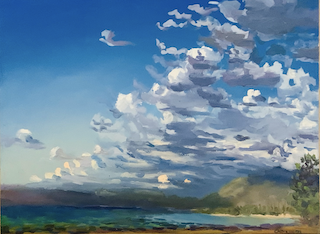

--- grey image ----



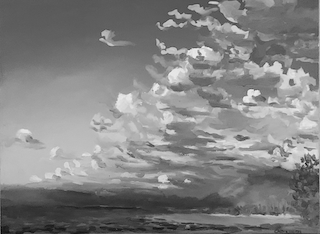

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
(2792, 2094)
-- original image --



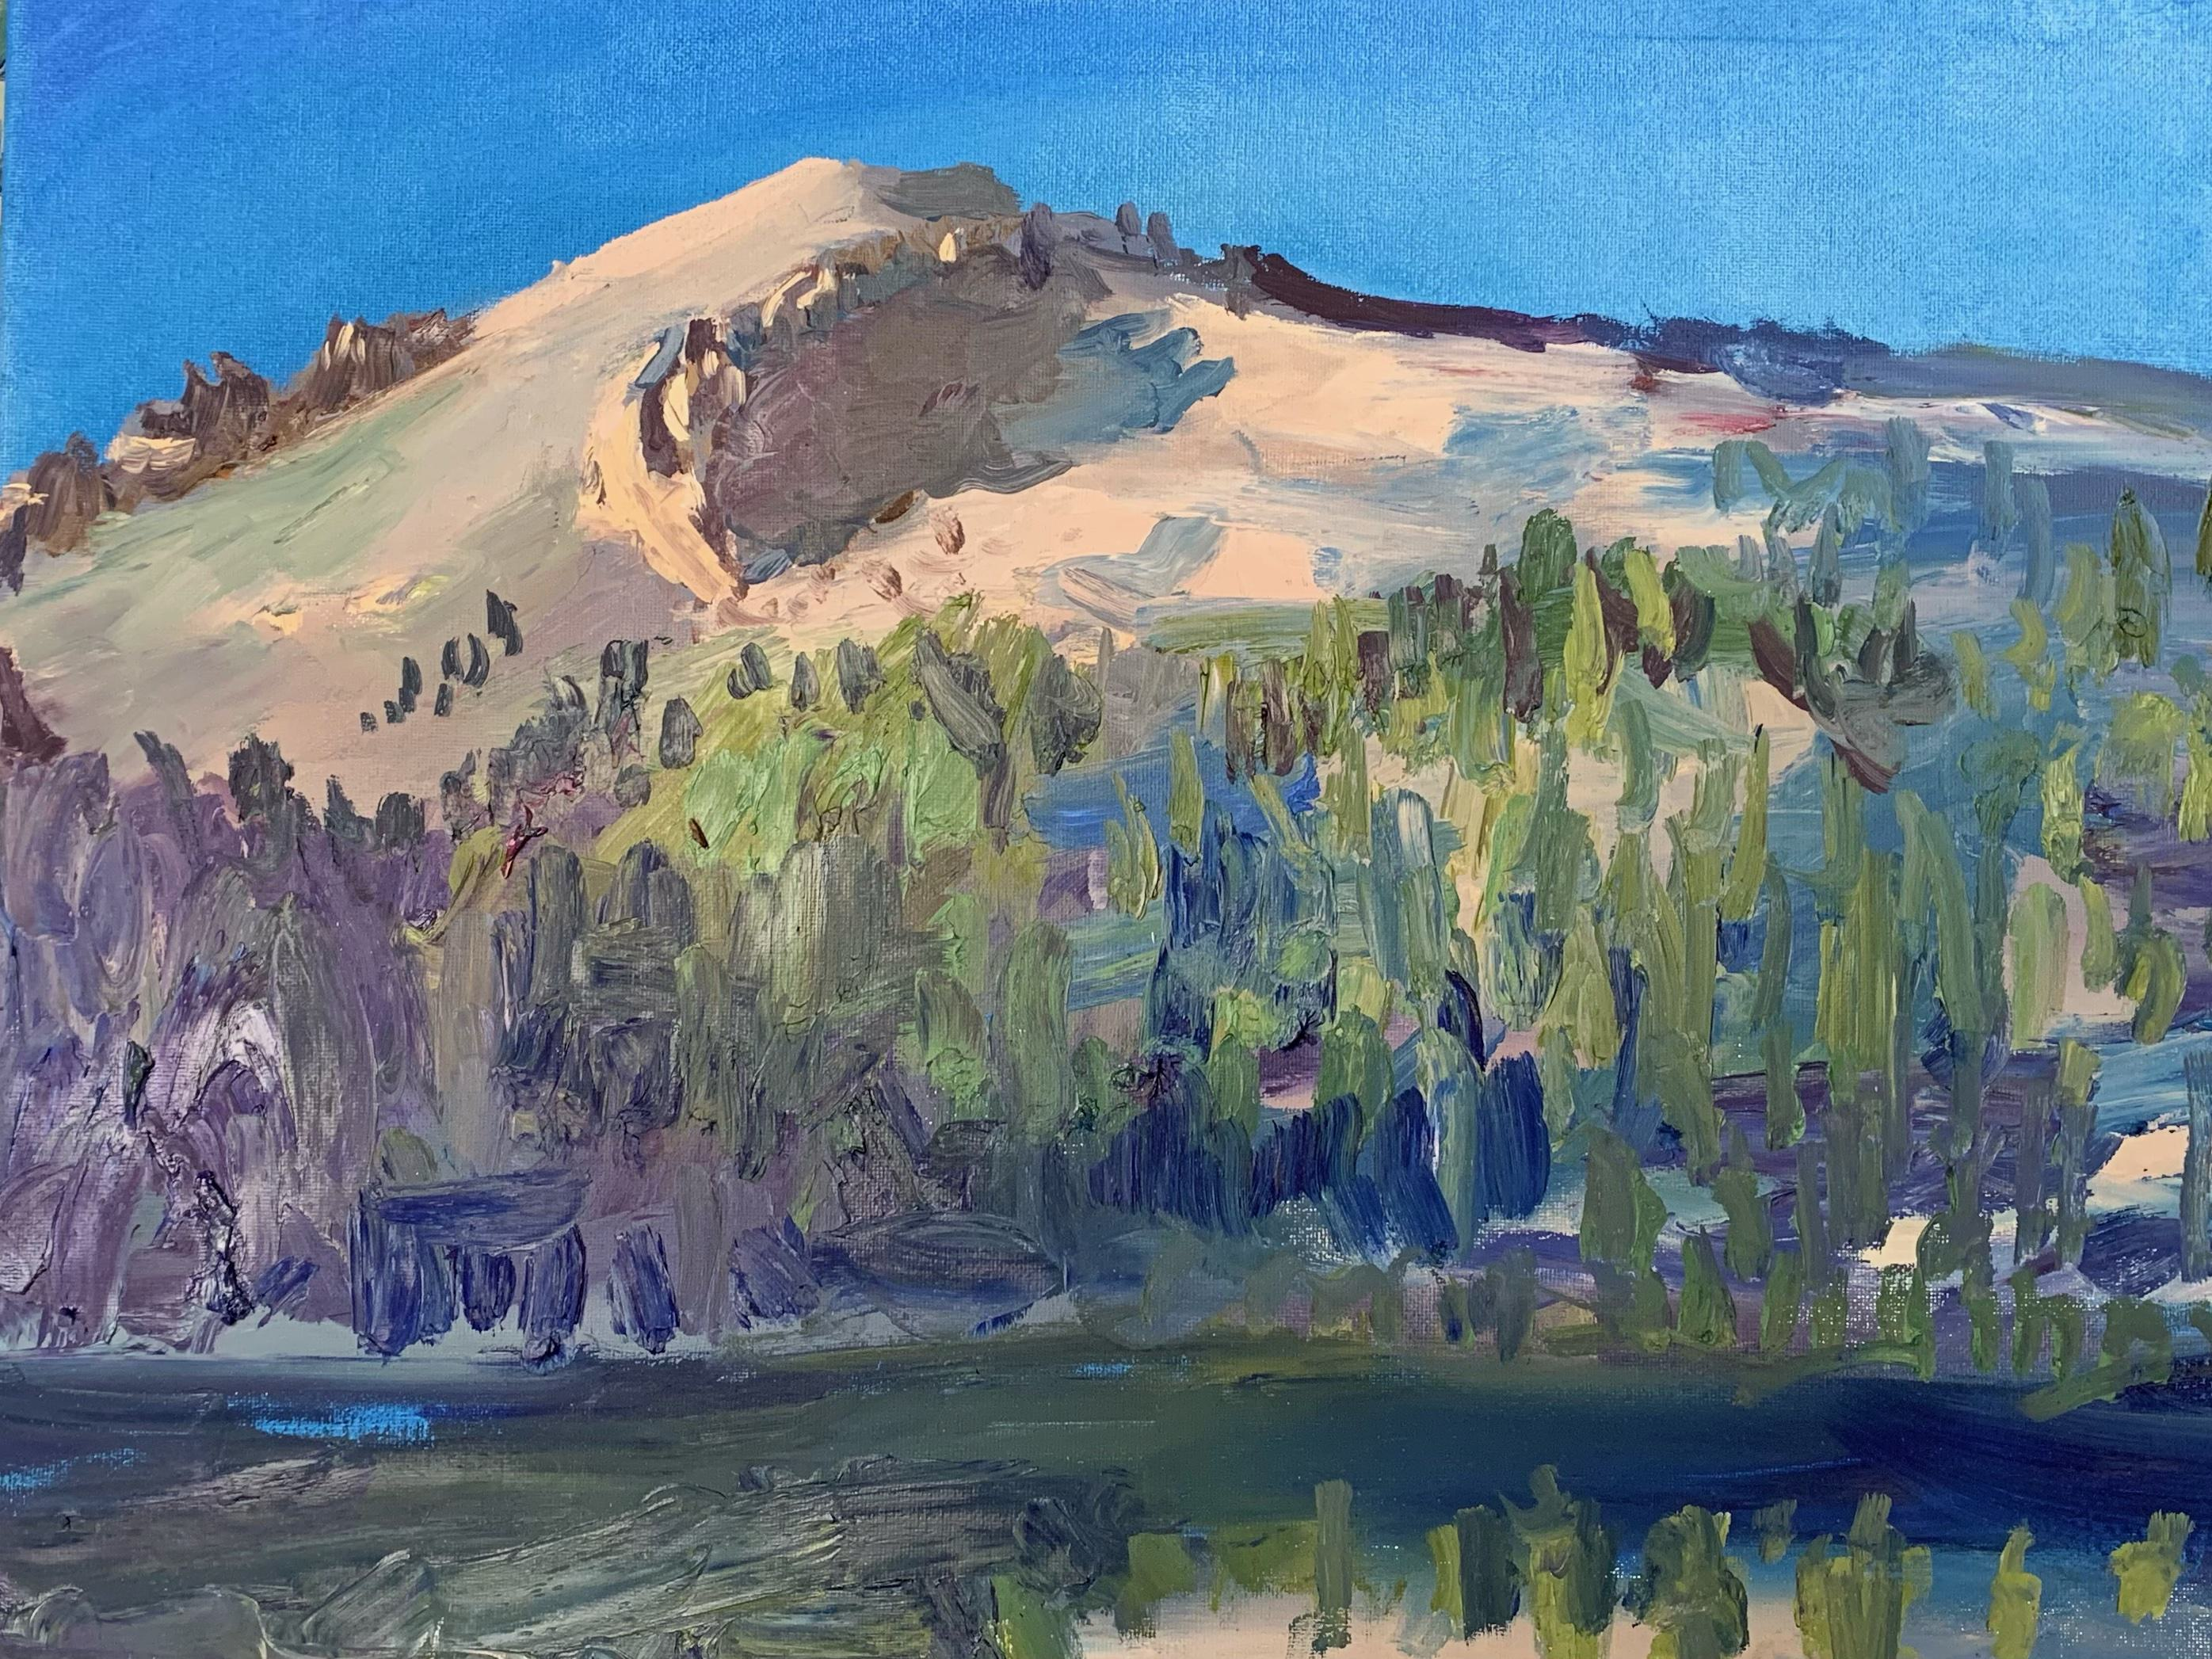

--- grey image ----



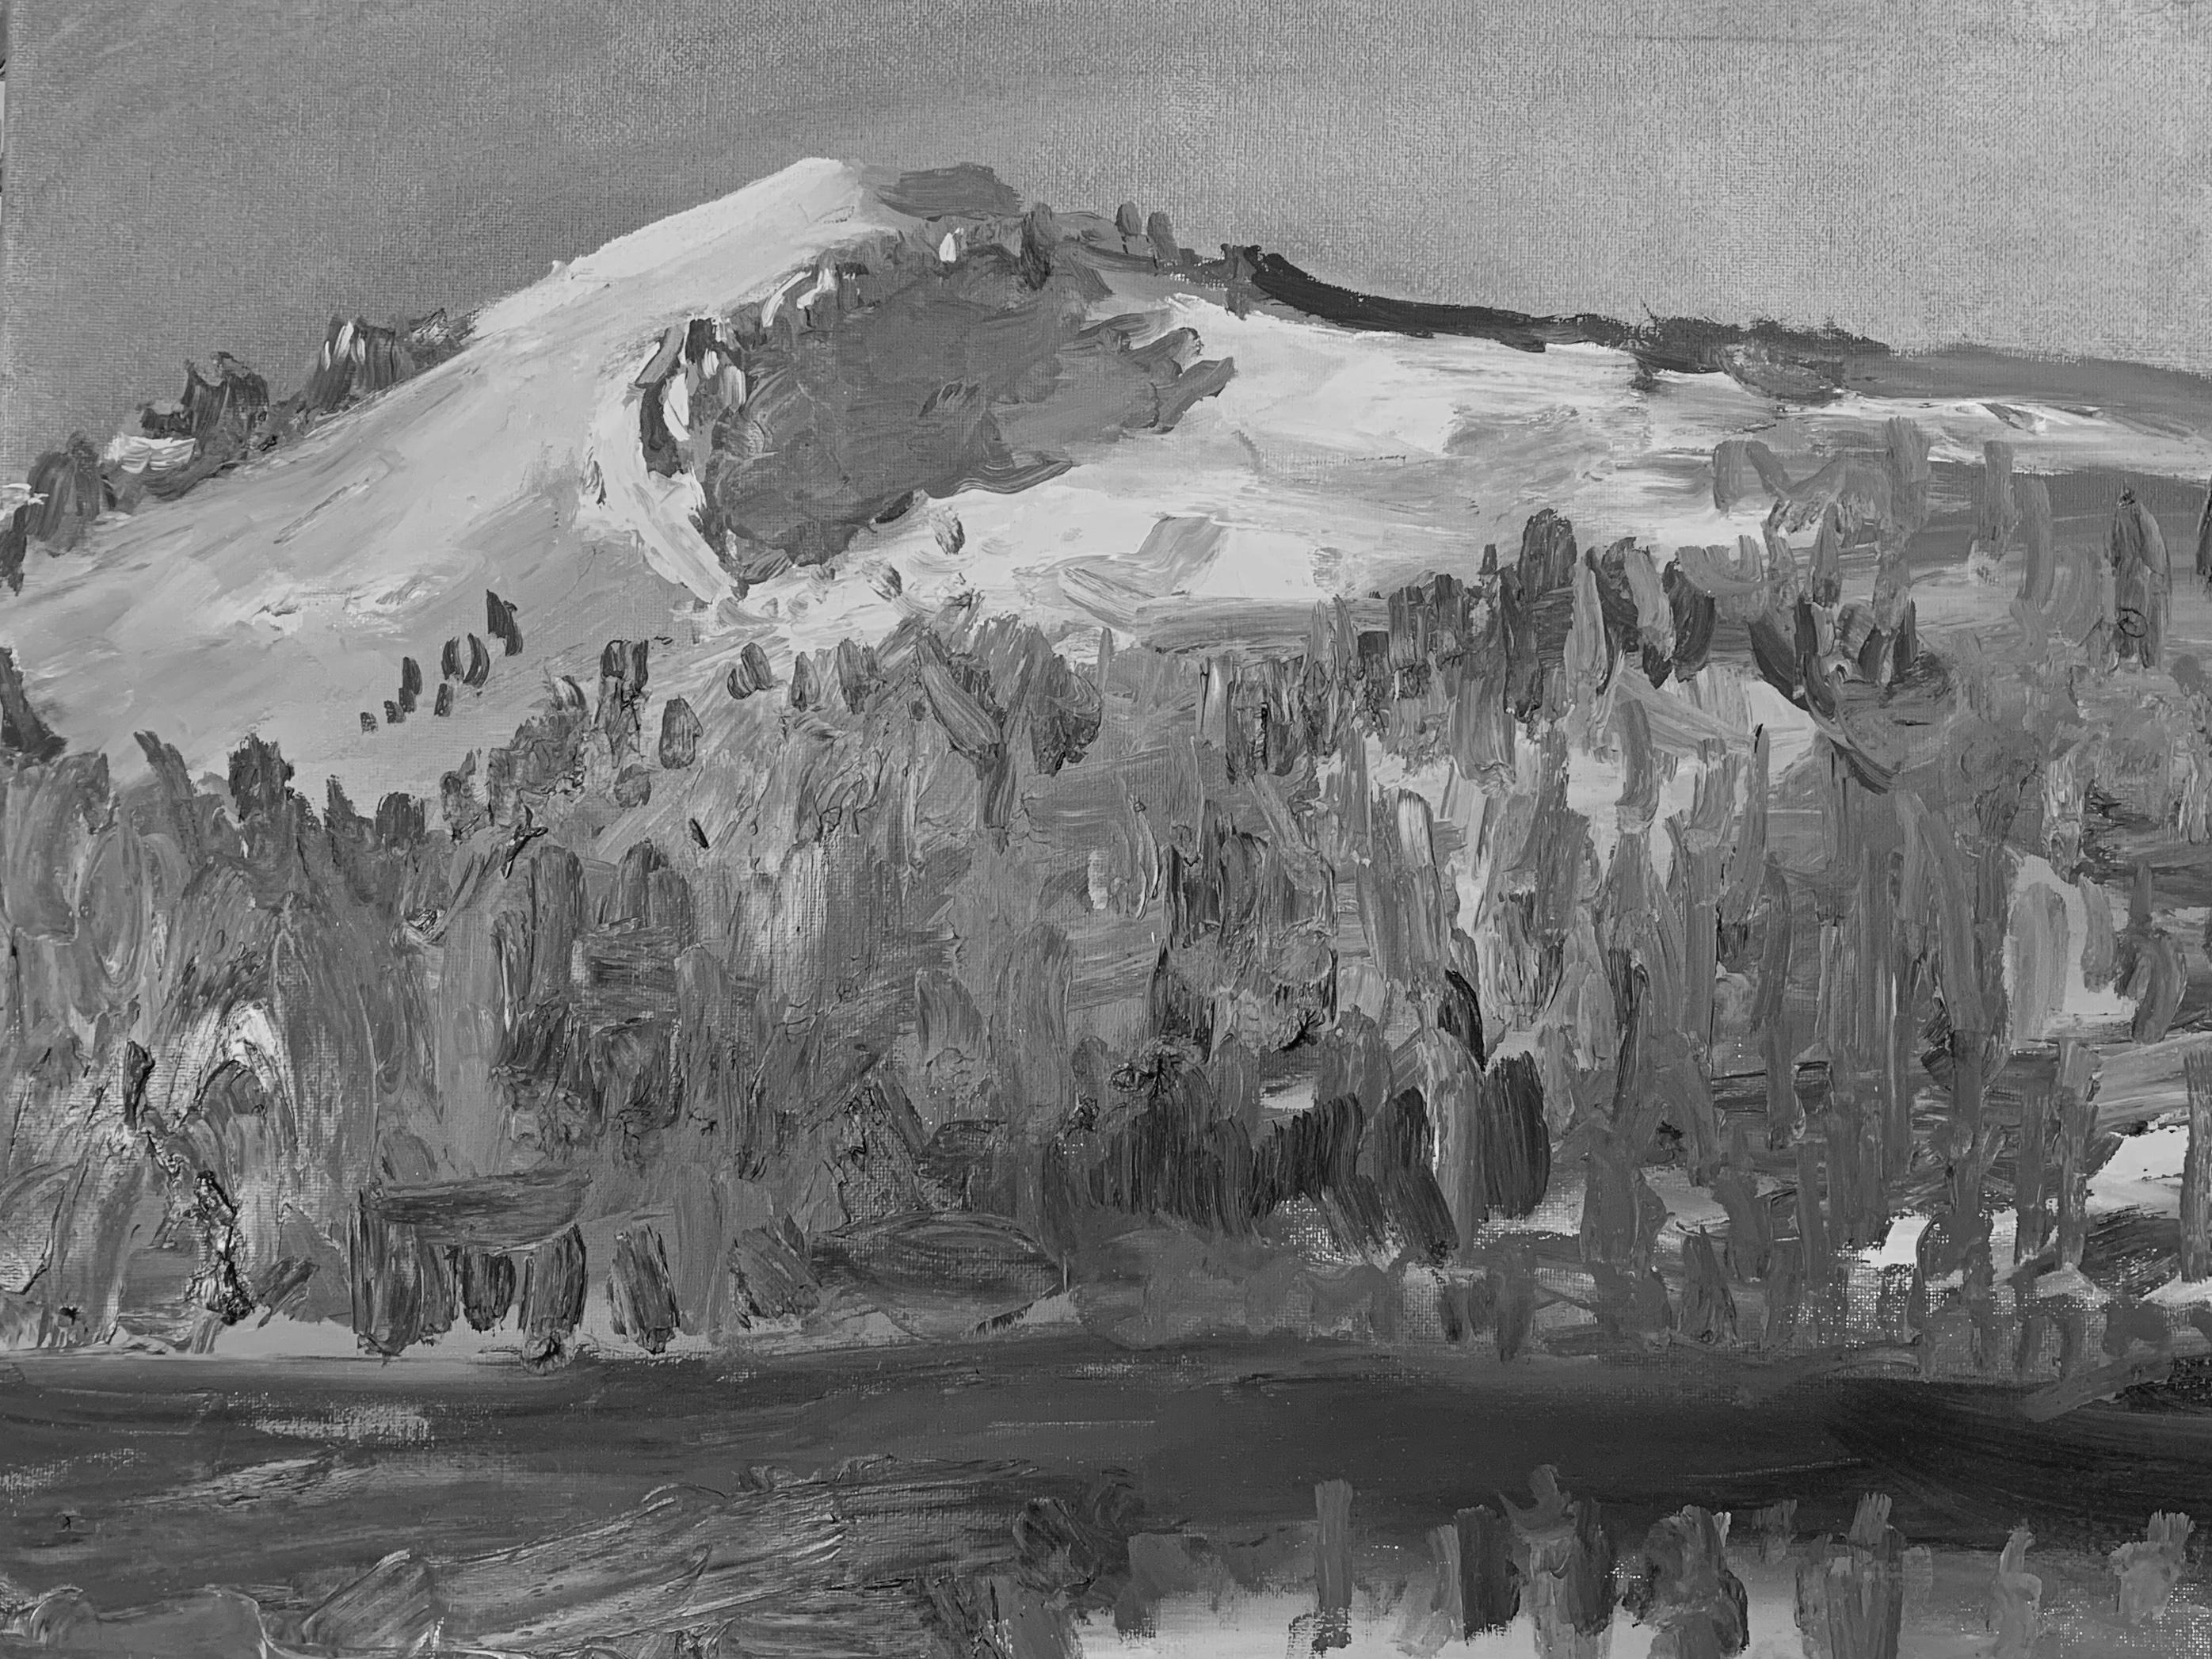

In [41]:

from PIL import Image as pilImage # pilImage is used to avoid conflict
from io import BytesIO
import base64

# convert PIL img to base64
def pil_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# 
def image_properties(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])

    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    image['html'] = '<img src="data:image/png;base64,%s">' % pil_to_base64(img, image['format'])
    

def image_properties_add_html_grey(image):
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['gray_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3]))
        else:
            image['gray_data'].append((average, average, average))
        # end for loop for pixels
        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % pil_to_base64(img, image['format'])



# Numpy limits terminal printing
def numpyPrint(title, data):
    data = np.array([data])
    print(title)
    print(data)
    
# run this as standalone tester to see sample data printed in terminal
if __name__ == "__main__":
    images = image_data()  # path of local run
    for image in images:
        image_properties(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print(image['size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_properties_add_html_grey(image)
        display(HTML(image['html_grey'])) 
       
    print()